# In Class Notebook, Week 07

You can always find here: https://github.com/UIUC-iSchool-DataViz/is445_oauoag_fall2022/blob/master/week07/inClass_week07.ipynb  

Or into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import numpy as np
import bqplot 

## Quick bqplot maps

In [3]:
# 1. data/axis
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. scales
sc_geo = bqplot.Mercator() # not a great projection!

# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map], fig_margin = {'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [4]:
# 1. data/axis
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# 2. scales
sc_geo = bqplot.Gnomonic() # not a great projection!

# 3. Marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[shape_map], fig_margin = {'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [5]:
# 1. data/axis
state_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales
sc_geo = bqplot.AlbersUSA() # projection specific to "zoomed in" regions near the US

# 3. marks
states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo})

# put it together as a figure
fig = bqplot.Figure(marks=[states_map], fig_margin = {'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [6]:
!ls /Users/jnaiman/opt/anaconda3/pkgs/bqplot-0.12.30-pyhd8ed1ab_0/site-packages/bqplot/map_data/

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Geopandas

In [7]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

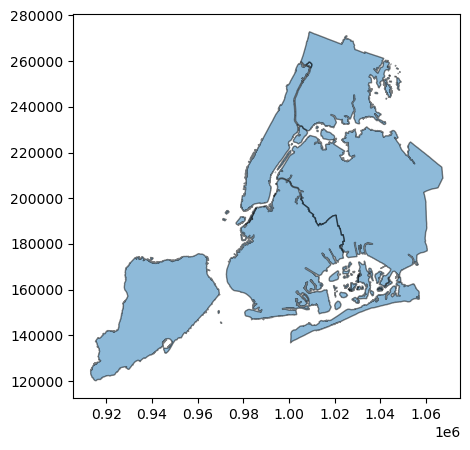

In [8]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = gdf.plot(figsize=(5,5),alpha=0.5, edgecolor='k')